In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

plt.rcParams.update({
#     "text.usetex": False,
    "pgf.texsystem": "pdflatex",
    "pgf.rcfonts": False,
    "pgf.preamble": [
         r"\usepackage[utf8x]{inputenc}",
         r"\usepackage[T1]{fontenc}",
         r"\usepackage{cmbright}",
         ],
    "font.size": 48,
})

In [2]:
def generate_full_graph(distances, output_fn=None, lines_at=[], layers=None, figsize=(20, 25)):
    if layers is None:
        layers = [str(i-1) for i in range(12, 0, -1)]

    fig, ax = plt.subplots(figsize=figsize)
    axes = distances[distances.columns[::-1]].plot.line(subplots=True, ax=ax)
    fig.set_facecolor('white')


    ax = fig.add_subplot(111, frameon=False)
    # hide tick and tick label of the big axis
    ax.tick_params(axis='x', labelcolor='none', top=False, bottom=False, left=False, right=False)
    ax.set_ylabel('Mean L2 Norm')
    ax.set_xlabel('Training Steps')
    ax.grid(False)
    ax.tick_params(axis='y', labelcolor='black', left=False)
    ax.tick_params(axis='x', labelcolor='black', left=False)
    
    ax.set_yticks([0] + [x + 0.5 for x in range(0, len(layers))] + [len(layers)])
    ax.set_yticklabels(['Layer    '] + [layers[len(layers) - x - 1] for x in range(0, len(layers))] + ['Layer    '])
    ax.set_ylim([0, len(layers)])
    
    ax.set_xlim([0, 600])
    for l in lines_at:
        ax.axvline(x=l, color='k')

#     ax.axvline(x=210, color='k')
#     ax.axvline(x=392, color='k')
    
    e0 = (0.0 + lines_at[0]) / 2.0
    e1 = (lines_at[0] + lines_at[1]) / 2.0
    e2 = (lines_at[1] + 600.0) / 2.0
    ax.set_xticks([e0, e1, e2])
    ax.set_xticklabels(['Epoch 0', 'Epoch 1', 'Epoch 2'])

    ymin = distances.min(axis=0)
    ymax = distances.max(axis=0)

    yrange = (ymax - ymin).max() * 1.10


    for i, ax in enumerate(axes):
        # ax.set_facecolor('black')
        ax.get_legend().remove()
        # patches, labels = ax.get_legend_handles_labels()
        # ax.legend(patches, labels, loc=3, prop={'size':24})
        ax.set_xticks([], [])
        ax.set_yticks([], [])

        layer_num = layers[i]
        mid = (ymax.loc[layer_num] + ymin.loc[layer_num]) / 2

        # ax.set_ylim([ymin.loc[layer_num], ymax.loc[layer_num]])
        # ax.set_ylim([ymin.min(), ymax.max()])
        ax.set_ylim([mid - yrange / 2.0, mid + yrange / 2.0])

#         ax.axvline(x=200, color='k')
#         ax.axvline(x=400, color='k')
        
    if output_fn is not None:
        fig.savefig(output_fn, bbox_inches='tight')

/home/user/data/uva/nlp2/cross-lingual-transfer-learning/venv/lib/python3.7/site-packages/pandas/plotting/_matplotlib/__init__.py:61: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()
/home/user/data/uva/nlp2/cross-lingual-transfer-learning/venv/lib/python3.7/site-packages/ipykernel_launcher.py:47: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
/home/user/data/uva/nlp2/cross-lingual-transfer-learning/venv/lib/python3.7/site-packages/ipykernel_launcher.py:48: MatplotlibDeprecationWarning: Passing the minor parameter of set_yticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


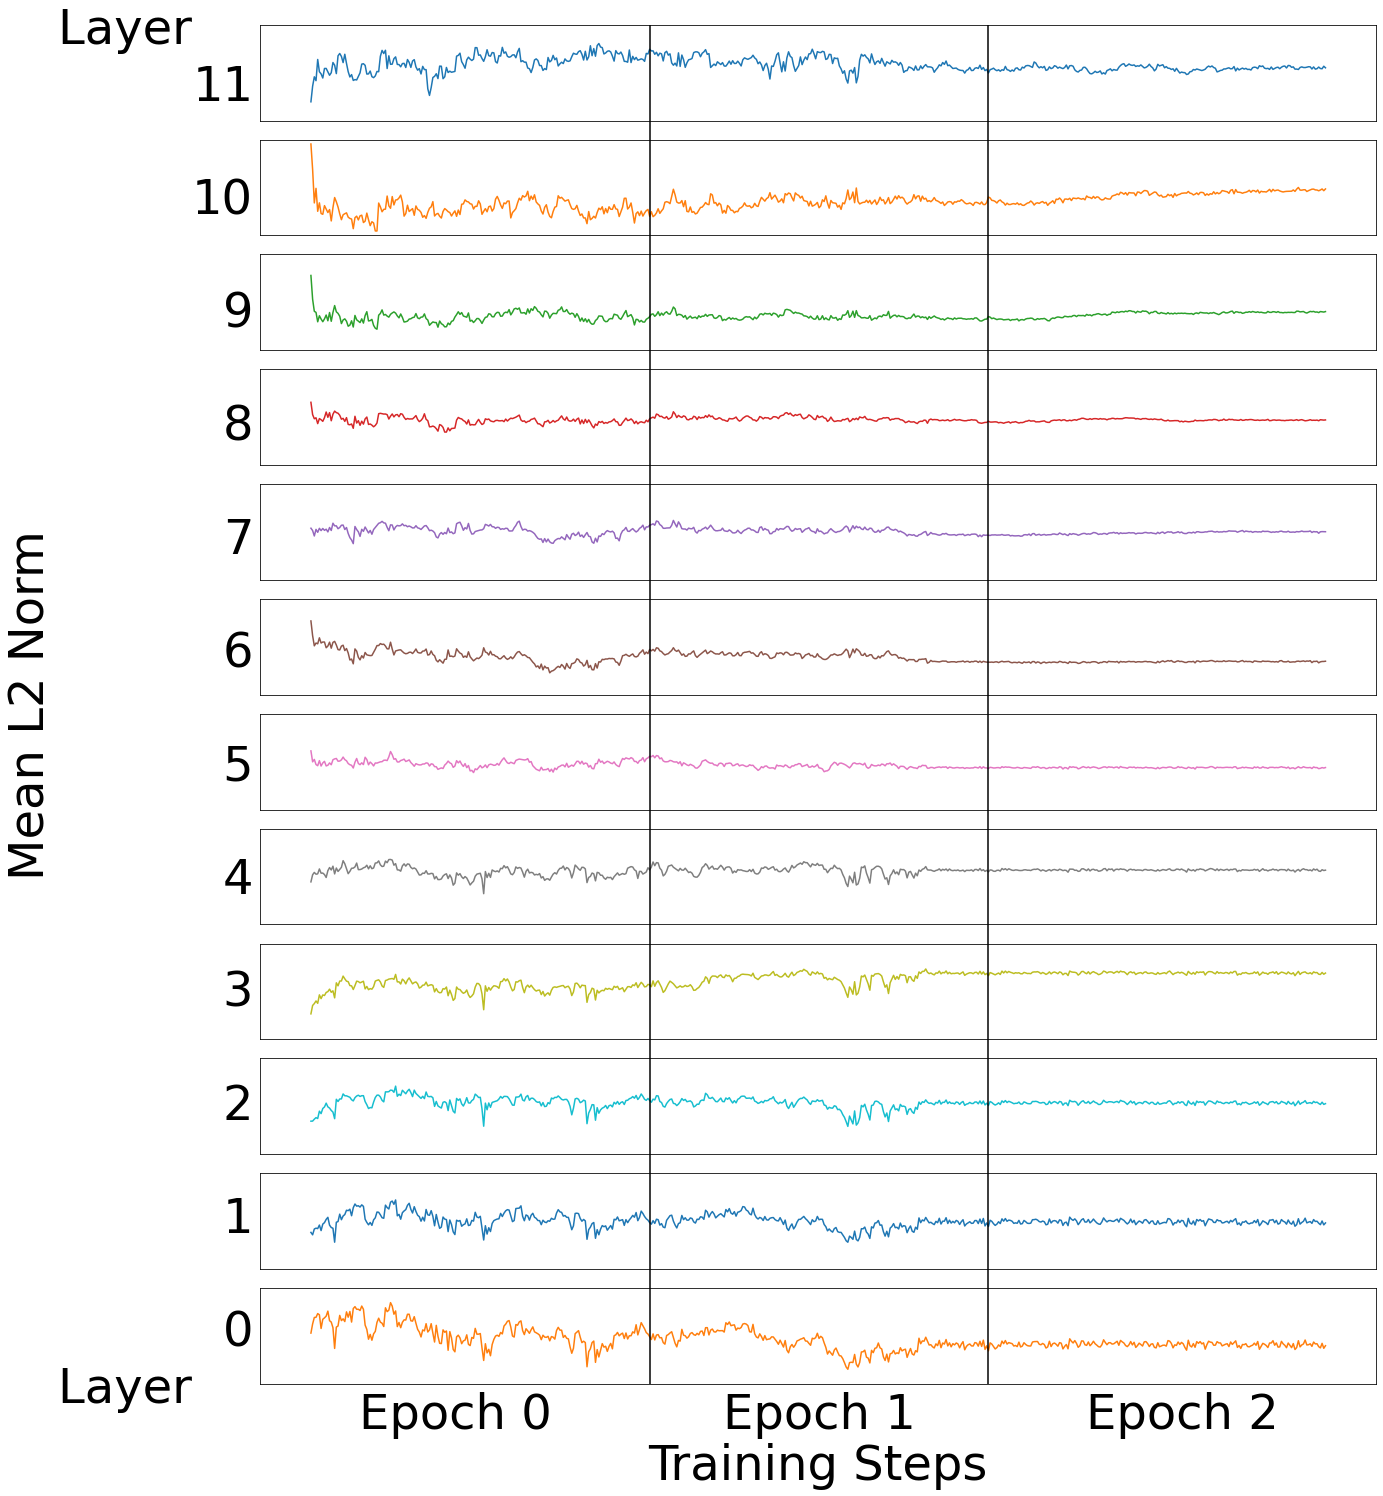

In [3]:
distances = pd.read_csv('../report/data/finetune_bert_00_diff.csv')
generate_full_graph(distances, '../report/graphs/finetune_bert_00_diff_all.pgf', [209.5, 391.5])

/home/user/data/uva/nlp2/cross-lingual-transfer-learning/venv/lib/python3.7/site-packages/pandas/plotting/_matplotlib/__init__.py:61: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()
/home/user/data/uva/nlp2/cross-lingual-transfer-learning/venv/lib/python3.7/site-packages/ipykernel_launcher.py:47: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
/home/user/data/uva/nlp2/cross-lingual-transfer-learning/venv/lib/python3.7/site-packages/ipykernel_launcher.py:48: MatplotlibDeprecationWarning: Passing the minor parameter of set_yticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


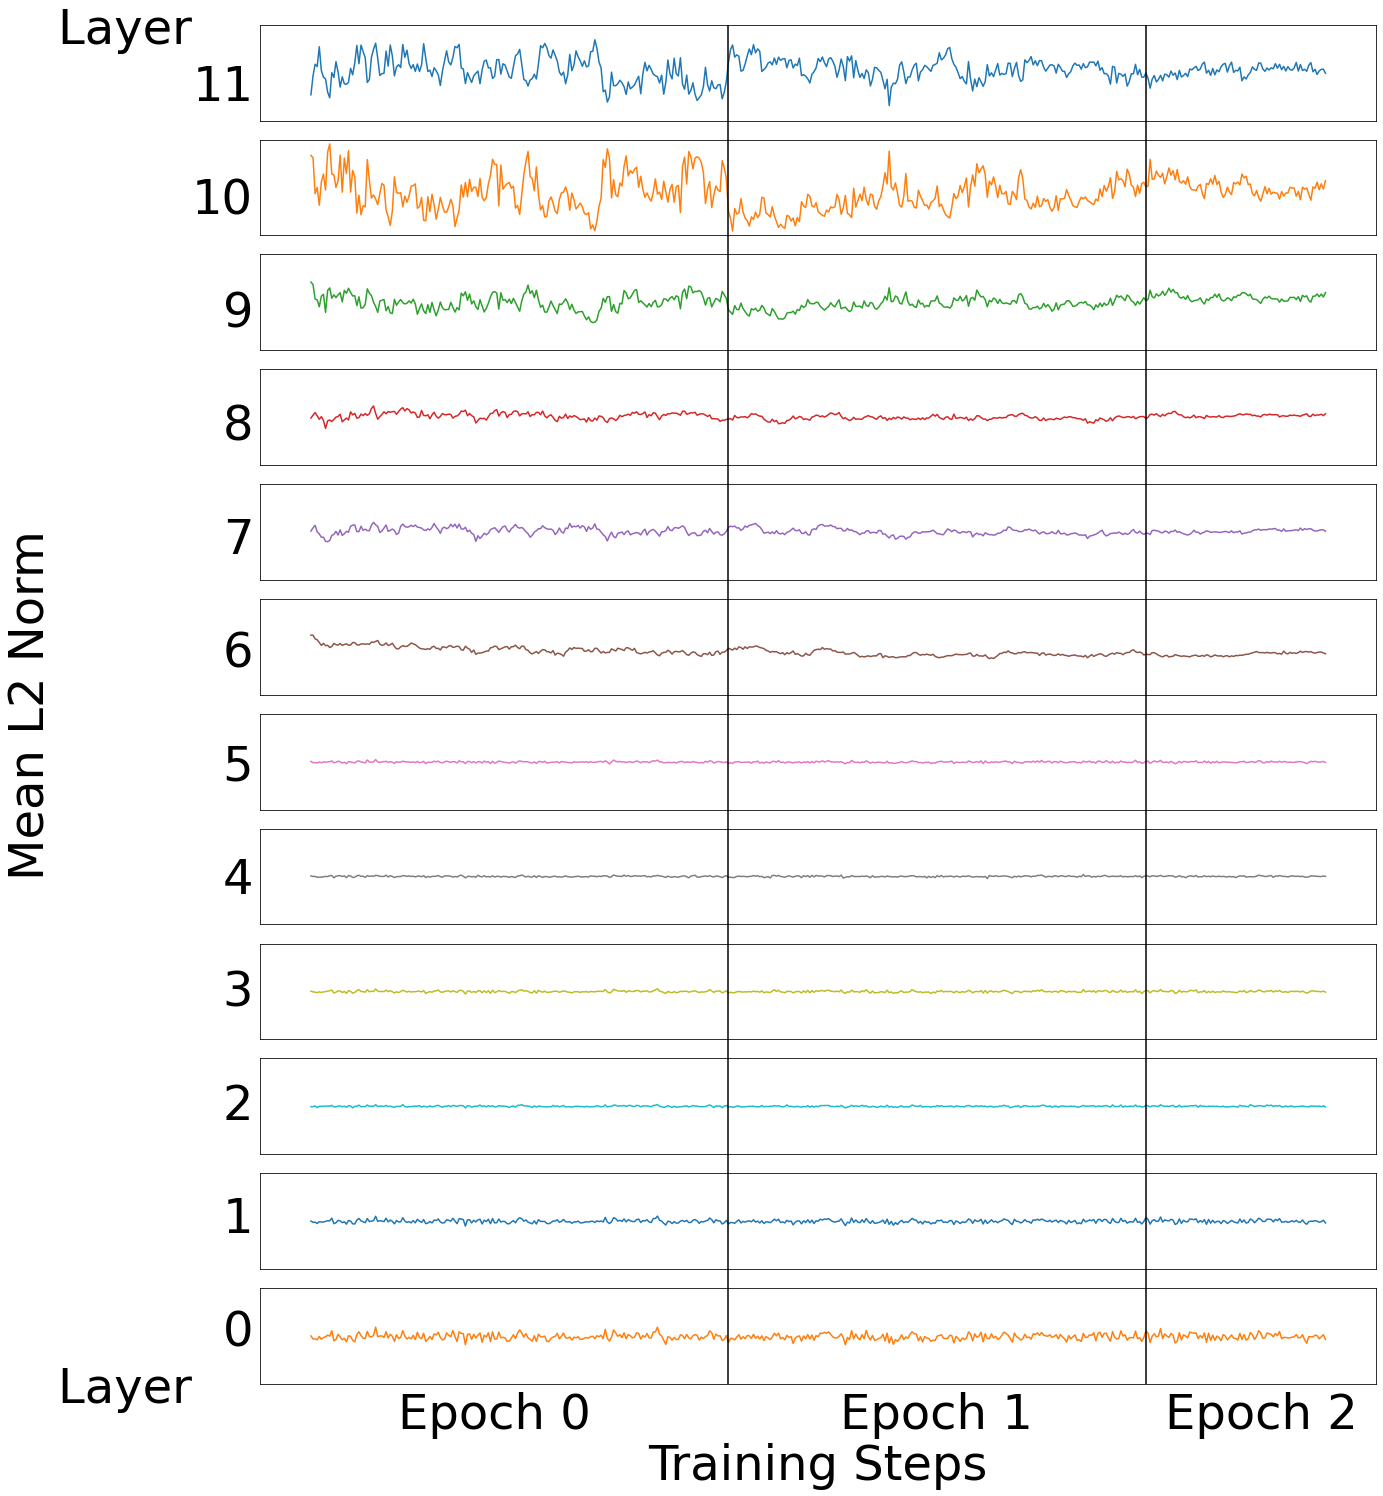

In [4]:
distances = pd.read_csv('../report/data/finetune_bert_06_diff.csv')
generate_full_graph(distances, '../report/graphs/finetune_bert_06_diff_all.pgf', [251.5, 476])

/home/user/data/uva/nlp2/cross-lingual-transfer-learning/venv/lib/python3.7/site-packages/pandas/plotting/_matplotlib/__init__.py:61: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()
/home/user/data/uva/nlp2/cross-lingual-transfer-learning/venv/lib/python3.7/site-packages/ipykernel_launcher.py:47: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
/home/user/data/uva/nlp2/cross-lingual-transfer-learning/venv/lib/python3.7/site-packages/ipykernel_launcher.py:48: MatplotlibDeprecationWarning: Passing the minor parameter of set_yticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


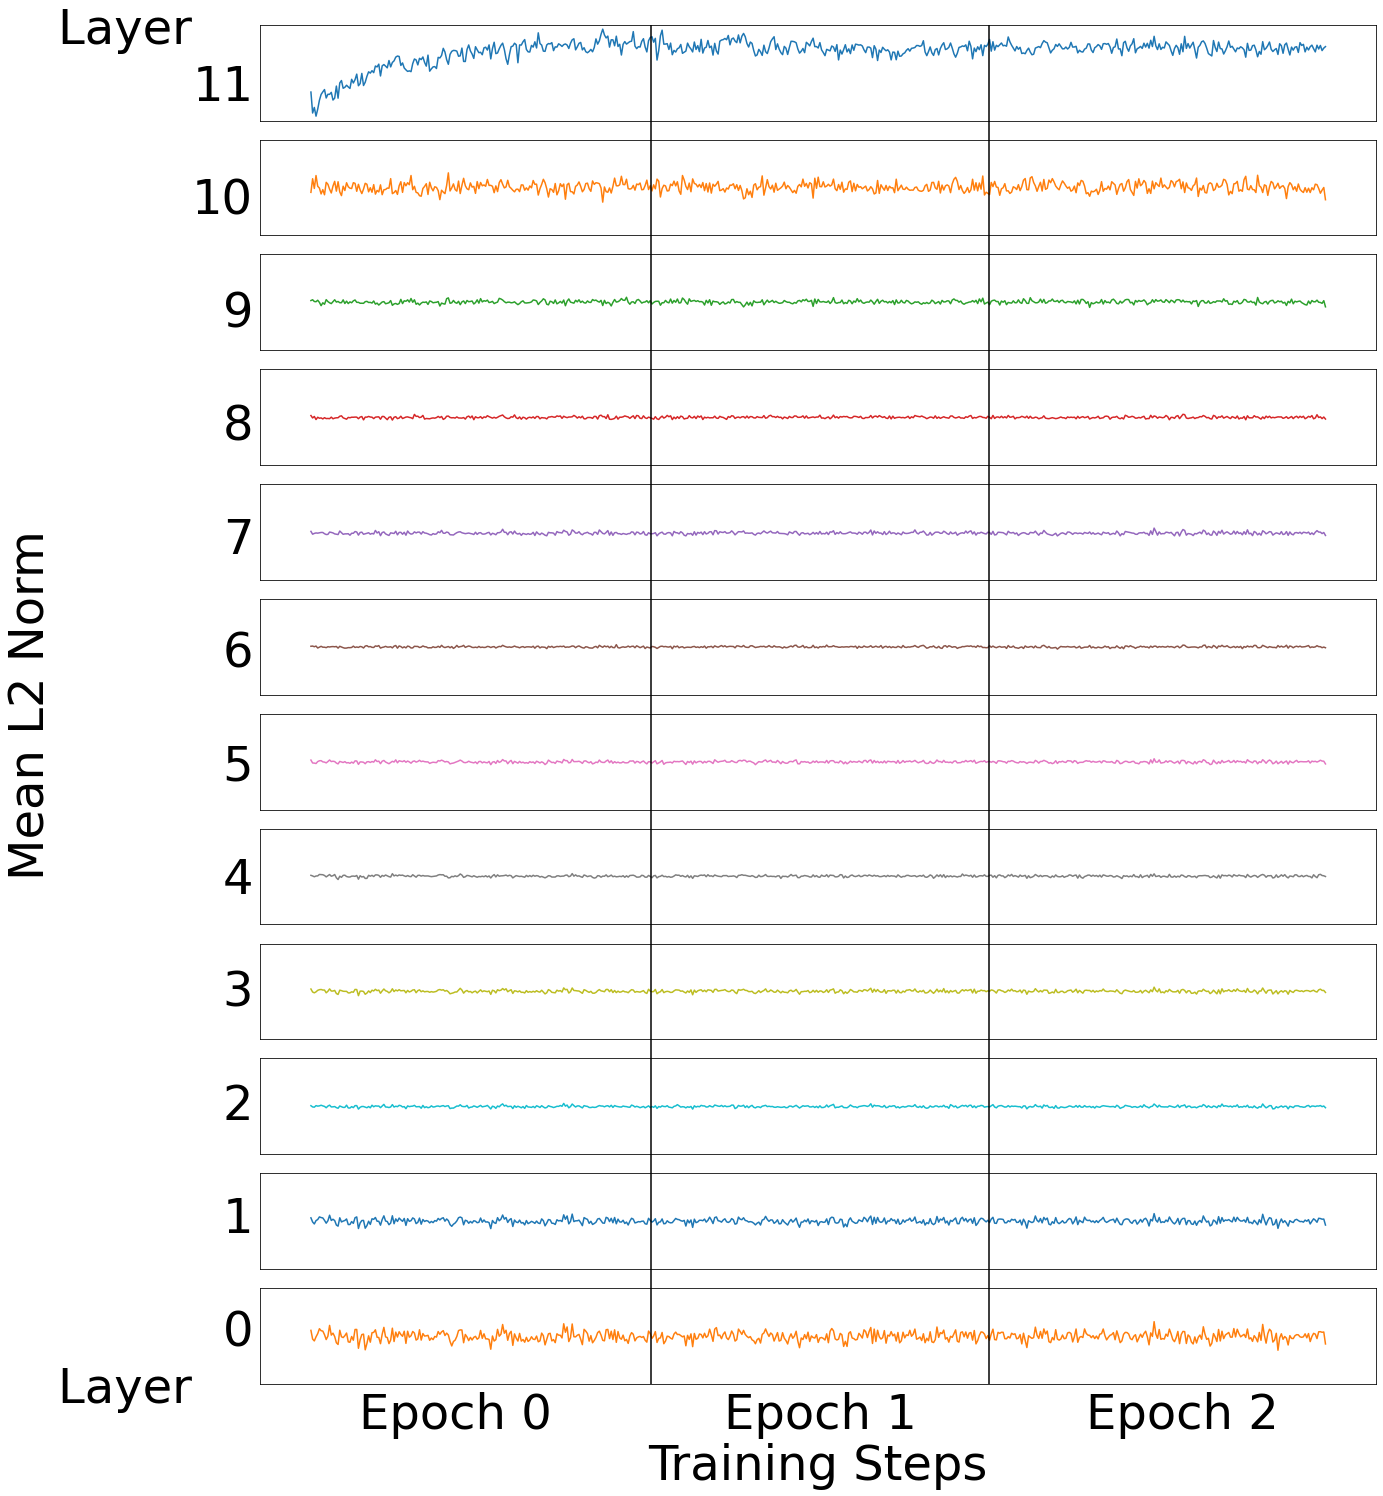

In [5]:
distances = pd.read_csv('../report/data/finetune_bert_11_diff.csv')
generate_full_graph(distances, '../report/graphs/finetune_bert_11_diff_all.pgf', [210, 392])

/home/user/data/uva/nlp2/cross-lingual-transfer-learning/venv/lib/python3.7/site-packages/pandas/plotting/_matplotlib/__init__.py:61: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()
/home/user/data/uva/nlp2/cross-lingual-transfer-learning/venv/lib/python3.7/site-packages/ipykernel_launcher.py:47: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
/home/user/data/uva/nlp2/cross-lingual-transfer-learning/venv/lib/python3.7/site-packages/ipykernel_launcher.py:48: MatplotlibDeprecationWarning: Passing the minor parameter of set_yticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


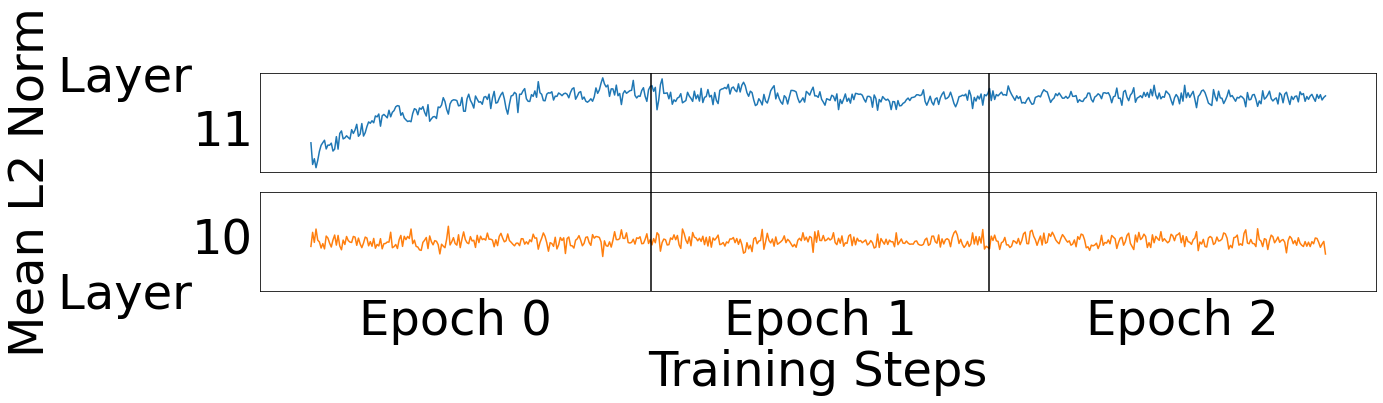

In [13]:
distances = pd.read_csv('../report/data/finetune_bert_11_diff.csv')
generate_full_graph(distances[['10', '11']], '../report/graphs/finetune_bert_11_diff_layer_11.pgf', [210, 392], layers=['11', '10'], figsize=(20, 4))

/home/user/data/uva/nlp2/cross-lingual-transfer-learning/venv/lib/python3.7/site-packages/pandas/plotting/_matplotlib/__init__.py:61: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()
/home/user/data/uva/nlp2/cross-lingual-transfer-learning/venv/lib/python3.7/site-packages/ipykernel_launcher.py:47: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
/home/user/data/uva/nlp2/cross-lingual-transfer-learning/venv/lib/python3.7/site-packages/ipykernel_launcher.py:48: MatplotlibDeprecationWarning: Passing the minor parameter of set_yticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


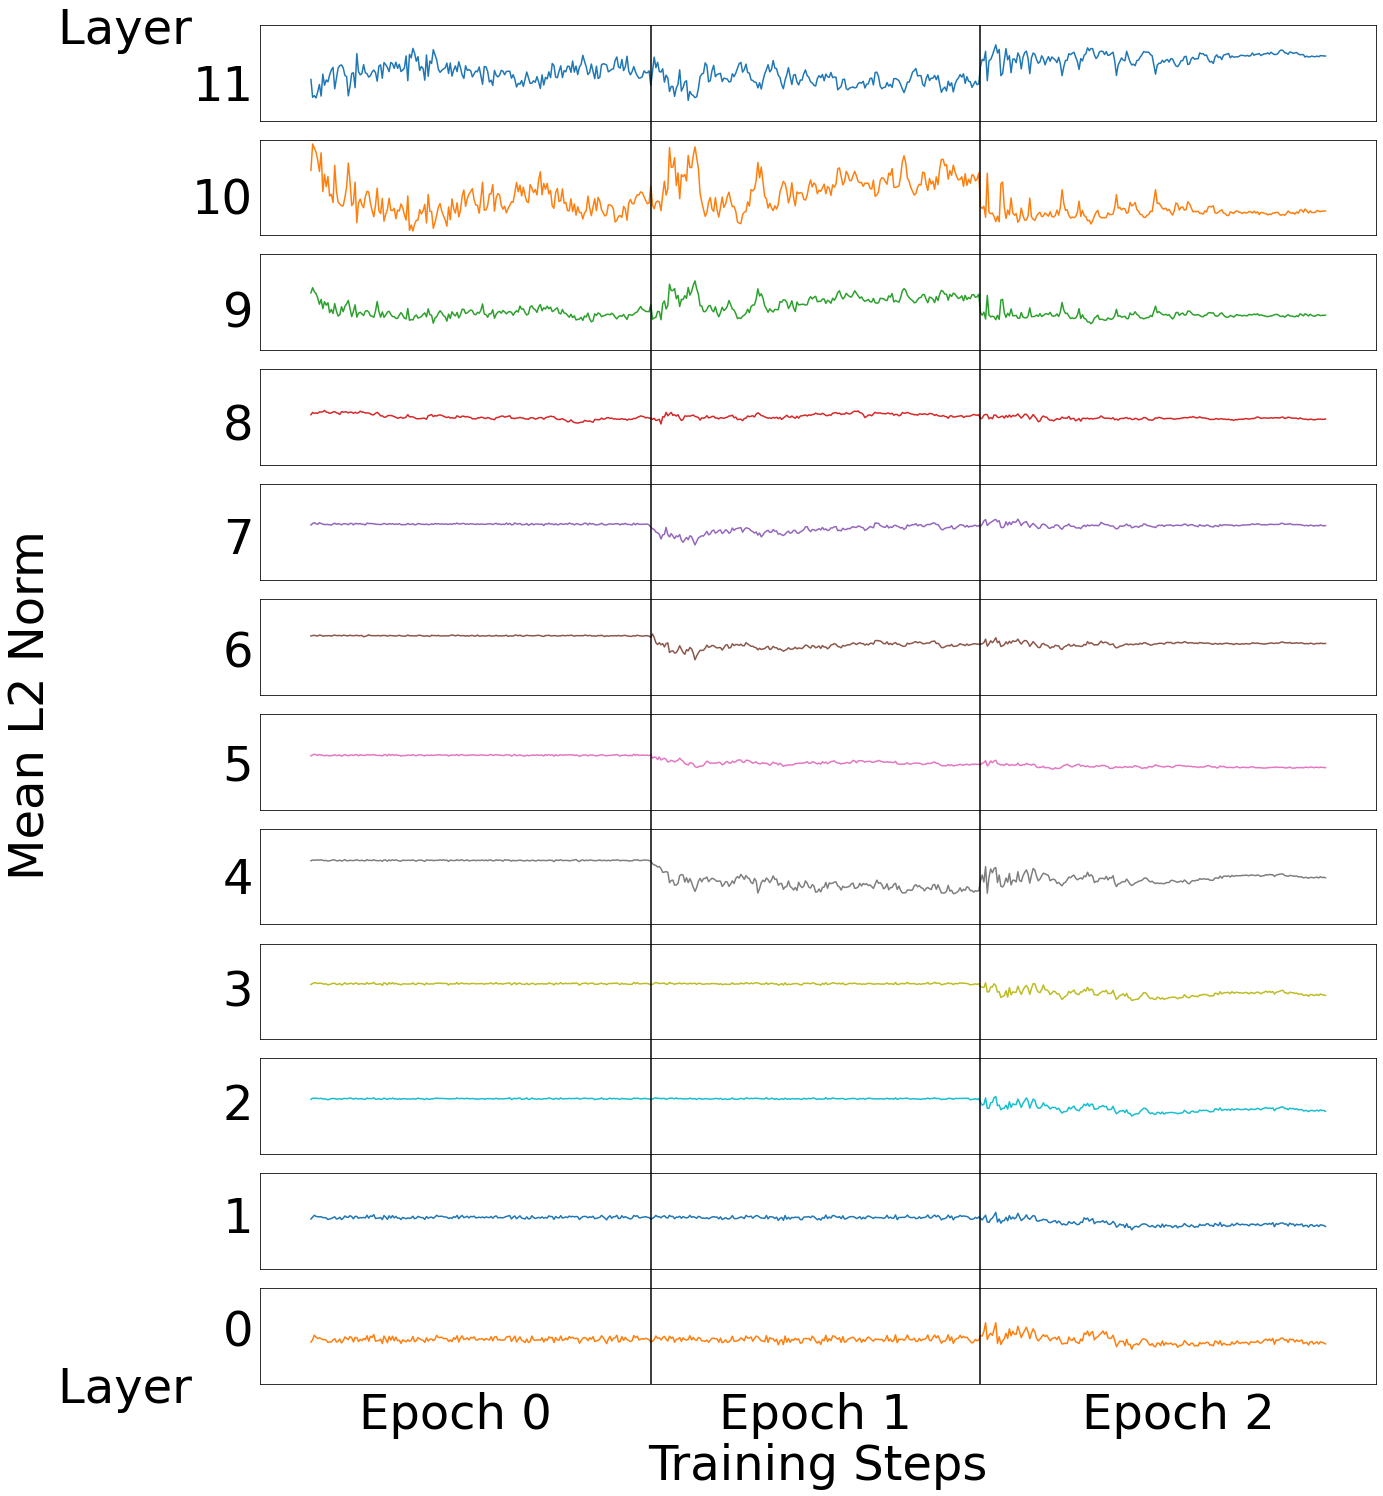

In [7]:
distances = pd.read_csv('../report/data/finetune_bert_gradual_diff.csv')
generate_full_graph(distances, '../report/graphs/finetune_bert_gradual_diff_all.pgf', lines_at=[210, 387])

/home/user/data/uva/nlp2/cross-lingual-transfer-learning/venv/lib/python3.7/site-packages/pandas/plotting/_matplotlib/__init__.py:61: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()
/home/user/data/uva/nlp2/cross-lingual-transfer-learning/venv/lib/python3.7/site-packages/ipykernel_launcher.py:47: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
/home/user/data/uva/nlp2/cross-lingual-transfer-learning/venv/lib/python3.7/site-packages/ipykernel_launcher.py:48: MatplotlibDeprecationWarning: Passing the minor parameter of set_yticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


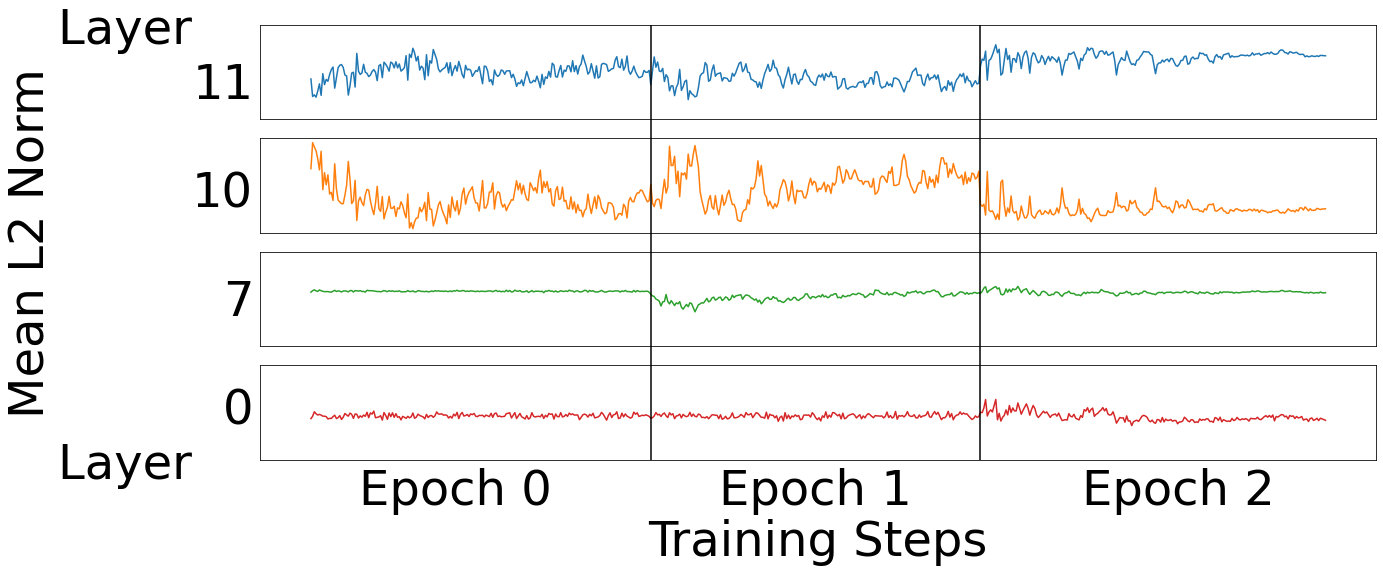

In [8]:
distances = pd.read_csv('../report/data/finetune_bert_gradual_diff.csv')
generate_full_graph(distances[['0', '7', '10', '11']], '../report/graphs/finetune_bert_gradual_diff_some.pgf', lines_at=[210, 387], layers=['11', '10', '7', '0'], figsize=(20, 8))